In [1]:
'''
British Airways Customer Reviews with NLP
Lachandra Ash
'''

'\nBritish Airways Customer Reviews with Web Scraping\nLachandra Ash\n'

In [2]:
#Import the necessary libraries and modules.
import re
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import spacy
import en_core_web_sm
import textacy

import nltk
from nltk import FreqDist
from nltk import wordpunct_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem.porter import *
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet

from PIL import Image
from wordcloud import WordCloud,STOPWORDS

import gensim 
import pyLDAvis
from gensim import corpora, models
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.parsing.preprocessing import preprocess_string, strip_punctuation, strip_numeric
from gensim.models import LdaMulticore

import tensorflow as tf
from transformers import pipeline
import torch
from keras.saving.hdf5_format import save_attributes_to_hdf5_group


import warnings
warnings.filterwarnings("ignore")

C:\Users\avami\OneDrive\Documents\Anaconda\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [3]:
#Reading British Airways csv file into a pandas dataframe.
BritAir= pd.read_csv('British_Airways.csv', index_col=[0])
BritAir

,reviews
0,Not Verified | Worst experience ever. Outbound...
1,✅ Trip Verified | Check in was a shambles at ...
2,✅ Trip Verified | Beyond disgusted with the fa...
3,✅ Trip Verified | On July 19th 2022 I had subm...
4,✅ Trip Verified | I booked the flight on Oct ...
...,...
3413,Flew LHR - VIE return operated by bmi but BA a...
3414,LHR to HAM. Purser addresses all club passenge...
3415,My son who had worked for British Airways urge...
3416,London City-New York JFK via Shannon on A318 b...


<h2> Data Cleaning

In [4]:
#Checking sum of BritAir dataframe.
BritAir.isna().sum()

reviews    0
dtype: int64

In [5]:
#Checking sum of dataframe.
BritAir.duplicated().sum()

16

In [6]:
#Drop duplicates.
BritAir.drop_duplicates()

,reviews
0,Not Verified | Worst experience ever. Outbound...
1,✅ Trip Verified | Check in was a shambles at ...
2,✅ Trip Verified | Beyond disgusted with the fa...
3,✅ Trip Verified | On July 19th 2022 I had subm...
4,✅ Trip Verified | I booked the flight on Oct ...
...,...
3413,Flew LHR - VIE return operated by bmi but BA a...
3414,LHR to HAM. Purser addresses all club passenge...
3415,My son who had worked for British Airways urge...
3416,London City-New York JFK via Shannon on A318 b...


In [7]:
# Defineing a function to clean the dataframe text.
def clean(text):
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text
BritAir['cleaned reviews'] = BritAir['reviews'].apply(clean)
BritAir.head()

,reviews,cleaned reviews
0,Not Verified | Worst experience ever. Outbound...,Not Verified Worst experience ever Outbound fl...
1,✅ Trip Verified | Check in was a shambles at ...,Trip Verified Check in was a shambles at BWI ...
2,✅ Trip Verified | Beyond disgusted with the fa...,Trip Verified Beyond disgusted with the fact ...
3,✅ Trip Verified | On July 19th 2022 I had subm...,Trip Verified On July th I had submitted a co...
4,✅ Trip Verified | I booked the flight on Oct ...,Trip Verified I booked the flight on Oct but ...


<h2> Exploratory Data Analysis

In [8]:
#Checking dataframe's shape.
BritAir.shape

(3418, 2)

In [9]:
#Checking dataframe's information.
BritAir.info

<bound method DataFrame.info of                                                 reviews  \
0     Not Verified | Worst experience ever. Outbound...   
1     ✅ Trip Verified |  Check in was a shambles at ...   
2     ✅ Trip Verified | Beyond disgusted with the fa...   
3     ✅ Trip Verified | On July 19th 2022 I had subm...   
4     ✅ Trip Verified |  I booked the flight on Oct ...   
...                                                 ...   
3413  Flew LHR - VIE return operated by bmi but BA a...   
3414  LHR to HAM. Purser addresses all club passenge...   
3415  My son who had worked for British Airways urge...   
3416  London City-New York JFK via Shannon on A318 b...   
3417  SIN-LHR BA12 B747-436 First Class. Old aircraf...   

                                        cleaned reviews  
0     Not Verified Worst experience ever Outbound fl...  
1      Trip Verified Check in was a shambles at BWI ...  
2      Trip Verified Beyond disgusted with the fact ...  
3      Trip Verified On Jul

In [10]:
#Checking dataframe's description.
BritAir.describe()

,reviews,cleaned reviews
count,3418,3418
unique,3402,3402
top,BA on LCY to DUB in December flight almost ful...,BA on LCY to DUB in December flight almost ful...
freq,2,2


In [11]:
#Checking dtypes.
BritAir.dtypes

reviews            object
cleaned reviews    object
dtype: object

In [12]:
#Checking dataframe's columns.
BritAir.columns

Index(['reviews', 'cleaned reviews'], dtype='object')

In [13]:
#Checking dataframe's sum.
BritAir.sum()

reviews            Not Verified | Worst experience ever. Outbound...
cleaned reviews    Not Verified Worst experience ever Outbound fl...
dtype: object

In [14]:
#Checking dataframe's correlation.
BritAir.corr()

""


In [15]:
#Checking dataframe's covariance.
BritAir.cov()

""


In [16]:
#Checking for the number of unique features.
BritAir.nunique()

reviews            3402
cleaned reviews    3402
dtype: int64

In [17]:
#Verifying the trips.
BritAir['verified'] = BritAir.reviews.str.contains("Trip Verified")

In [52]:
#Displaying first five records.
BritAir.head()

,reviews,cleaned reviews,verified,text,language,pos tagged,lemma,sentiment,analysis
0,Not Verified | Worst experience ever. Outbound...,Not Verified Worst experience ever Outbound fl...,False,verified worst experience ever outbound flight...,hinglish,"[(Verified, n), (Worst, n), (experience, n), (...",Verified Worst experience ever Outbound flig...,-0.8591,Negative
1,✅ Trip Verified | Check in was a shambles at ...,Trip Verified Check in was a shambles at BWI ...,True,check shamble bwi counter open full flight bag...,hinglish,"[(Trip, n), (Verified, n), (Check, n), (shambl...",Trip Verified Check shamble BWI counter open...,0.5574,Positive
2,✅ Trip Verified | Beyond disgusted with the fa...,Trip Verified Beyond disgusted with the fact ...,True,beyond disgusted fact baggage yet delivered we...,hinglish,"[(Trip, n), (Verified, n), (Beyond, n), (disgu...",Trip Verified Beyond disgust fact baggage ye...,0.2960,Neutral
3,✅ Trip Verified | On July 19th 2022 I had subm...,Trip Verified On July th I had submitted a co...,True,july th submitted complaint form regard fact b...,hinglish,"[(Trip, n), (Verified, n), (July, n), (th, n),...",Trip Verified July th submit complaint form ...,-0.5423,Negative
4,✅ Trip Verified | I booked the flight on Oct ...,Trip Verified I booked the flight on Oct but ...,True,booked flight oct cancel flight day learning g...,hinglish,"[(Trip, n), (Verified, n), (booked, v), (fligh...",Trip Verified book flight Oct cancel flight ...,0.0454,Neutral


In [19]:
#Using Nltk libraries to lemmatize the words.
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
import nltk
lemma = WordNetLemmatizer()


reviews_data = BritAir.reviews.str.strip("✅ Trip Verified |")

#Constructing an empty list to gather cleansed data.
text =[]


for rev in reviews_data:
    rev = re.sub('[^a-zA-Z]',' ', rev)
    rev = rev.lower()
    rev = rev.split()
    rev = [lemma.lemmatize(word) for word in rev if word not in stopwords.words('english')]
    rev = " ".join(rev)
    text.append(rev)

In [20]:
#Creating text column.
BritAir['text'] = text

In [21]:
#Displaying first five records of dataframe.
BritAir.head()

,reviews,cleaned reviews,verified,text
0,Not Verified | Worst experience ever. Outbound...,Not Verified Worst experience ever Outbound fl...,False,verified worst experience ever outbound flight...
1,✅ Trip Verified | Check in was a shambles at ...,Trip Verified Check in was a shambles at BWI ...,True,check shamble bwi counter open full flight bag...
2,✅ Trip Verified | Beyond disgusted with the fa...,Trip Verified Beyond disgusted with the fact ...,True,beyond disgusted fact baggage yet delivered we...
3,✅ Trip Verified | On July 19th 2022 I had subm...,Trip Verified On July th I had submitted a co...,True,july th submitted complaint form regard fact b...
4,✅ Trip Verified | I booked the flight on Oct ...,Trip Verified I booked the flight on Oct but ...,True,booked flight oct cancel flight day learning g...


In [22]:
#Checking value counts of reviews.
BritAir['reviews'].value_counts()

BA on LCY to DUB in December flight almost full but cabin crew attentive and all smiling and offered a choice of popcorn or chips. Good value considering other airlines on this route does not serve complimentary snack at all.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [23]:
# Constructing stopwords dictionaries.

englishStopWords = set(nltk.corpus.stopwords.words('english'))
nonEnglishStopWords = set(nltk.corpus.stopwords.words()) - englishStopWords
stopWordsDictionary = {lang: set(nltk.corpus.stopwords.words(lang)) for lang in nltk.corpus.stopwords.fileids()}

In [24]:
# Creating a function for the governing language within the reviews.

def get_language(text):
    if type(text) is str:
        text = text.lower()
    words = set(nltk.wordpunct_tokenize(text))
    return max(((lang, len(words & stopwords)) for lang, stopwords in stopWordsDictionary.items()), key = lambda x: x[1])[0]

In [25]:
BritAir['language'] = BritAir['reviews'].apply(get_language)
language_count = BritAir['language'].value_counts()
language_count = language_count[:5]

In [26]:
#Deciding the type of dominant language.
BritAir['language'] = BritAir['reviews'].apply(get_language)
language_count = BritAir['language'].value_counts()
language_count = language_count[:5]

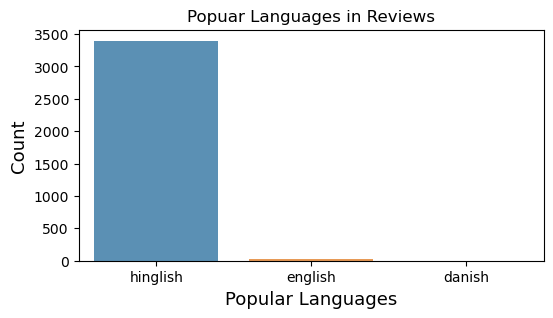

In [27]:
#Plot the popular review languages.
plt.figure(figsize = (6,3))
sns.barplot(language_count.index, language_count.values, alpha = 0.8)
plt.title('Popuar Languages in Reviews')
plt.ylabel('Count', fontsize = 13)
plt.xlabel('Popular Languages', fontsize = 13)
plt.show()

In [28]:
# Creating function for pos tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          
    return newlist 

BritAir['pos tagged'] = BritAir['cleaned reviews'].apply(token_stop_pos)
BritAir.head()

,reviews,cleaned reviews,verified,text,language,pos tagged
0,Not Verified | Worst experience ever. Outbound...,Not Verified Worst experience ever Outbound fl...,False,verified worst experience ever outbound flight...,hinglish,"[(Verified, n), (Worst, n), (experience, n), (..."
1,✅ Trip Verified | Check in was a shambles at ...,Trip Verified Check in was a shambles at BWI ...,True,check shamble bwi counter open full flight bag...,hinglish,"[(Trip, n), (Verified, n), (Check, n), (shambl..."
2,✅ Trip Verified | Beyond disgusted with the fa...,Trip Verified Beyond disgusted with the fact ...,True,beyond disgusted fact baggage yet delivered we...,hinglish,"[(Trip, n), (Verified, n), (Beyond, n), (disgu..."
3,✅ Trip Verified | On July 19th 2022 I had subm...,Trip Verified On July th I had submitted a co...,True,july th submitted complaint form regard fact b...,hinglish,"[(Trip, n), (Verified, n), (July, n), (th, n),..."
4,✅ Trip Verified | I booked the flight on Oct ...,Trip Verified I booked the flight on Oct but ...,True,booked flight oct cancel flight day learning g...,hinglish,"[(Trip, n), (Verified, n), (booked, v), (fligh..."


In [29]:
# Retrieving the stem words for Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

BritAir['lemma'] = BritAir['pos tagged'].apply(lemmatize)
BritAir.head()

,reviews,cleaned reviews,verified,text,language,pos tagged,lemma
0,Not Verified | Worst experience ever. Outbound...,Not Verified Worst experience ever Outbound fl...,False,verified worst experience ever outbound flight...,hinglish,"[(Verified, n), (Worst, n), (experience, n), (...",Verified Worst experience ever Outbound flig...
1,✅ Trip Verified | Check in was a shambles at ...,Trip Verified Check in was a shambles at BWI ...,True,check shamble bwi counter open full flight bag...,hinglish,"[(Trip, n), (Verified, n), (Check, n), (shambl...",Trip Verified Check shamble BWI counter open...
2,✅ Trip Verified | Beyond disgusted with the fa...,Trip Verified Beyond disgusted with the fact ...,True,beyond disgusted fact baggage yet delivered we...,hinglish,"[(Trip, n), (Verified, n), (Beyond, n), (disgu...",Trip Verified Beyond disgust fact baggage ye...
3,✅ Trip Verified | On July 19th 2022 I had subm...,Trip Verified On July th I had submitted a co...,True,july th submitted complaint form regard fact b...,hinglish,"[(Trip, n), (Verified, n), (July, n), (th, n),...",Trip Verified July th submit complaint form ...
4,✅ Trip Verified | I booked the flight on Oct ...,Trip Verified I booked the flight on Oct but ...,True,booked flight oct cancel flight day learning g...,hinglish,"[(Trip, n), (Verified, n), (booked, v), (fligh...",Trip Verified book flight Oct cancel flight ...


In [30]:
BritAir[['reviews','lemma']]

,reviews,lemma
0,Not Verified | Worst experience ever. Outbound...,Verified Worst experience ever Outbound flig...
1,✅ Trip Verified | Check in was a shambles at ...,Trip Verified Check shamble BWI counter open...
2,✅ Trip Verified | Beyond disgusted with the fa...,Trip Verified Beyond disgust fact baggage ye...
3,✅ Trip Verified | On July 19th 2022 I had subm...,Trip Verified July th submit complaint form ...
4,✅ Trip Verified | I booked the flight on Oct ...,Trip Verified book flight Oct cancel flight ...
...,...,...
3413,Flew LHR - VIE return operated by bmi but BA a...,Flew LHR VIE return operate bmi BA aircraft ...
3414,LHR to HAM. Purser addresses all club passenge...,LHR HAM Purser address club passenger name b...
3415,My son who had worked for British Airways urge...,son work British Airways urge fly British Ai...
3416,London City-New York JFK via Shannon on A318 b...,London City New York JFK via Shannon really ...


<h2> Constructing a Wordcloud From Reviews

In [34]:
# Creating dataframe with enlish reviews.
engreviews = BritAir[BritAir['language'] != 'danish']
engreviews = engreviews['reviews']

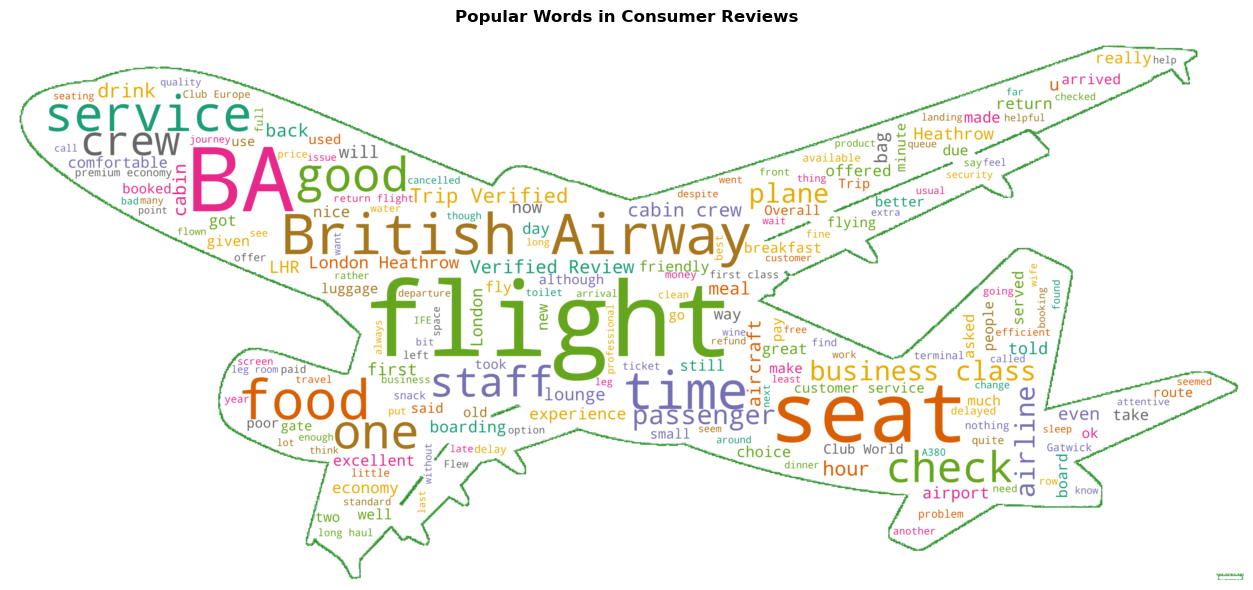

In [35]:
#Constructing the wordcloud.
def showWordCloud(data):
    unite_reviews = ' '.join(data)
    cleaned_reviews = ' '.join([word for word in unite_reviews.split()])
    plane_mask = np.array(Image.open("plane.jpg"))
    wordcloud = WordCloud(stopwords = STOPWORDS, 
                          background_color='white', 
                          mask=plane_mask, max_words=200, 
                          contour_width=3, contour_color='forestgreen',
                          colormap='Dark2'
                         ).generate(cleaned_reviews)
    plt.figure(figsize = (20,7))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.title('Popular Words in Consumer Reviews', pad = 14, weight = 'bold')
    plt.show();
    
showWordCloud(engreviews)

<h2> Sentiment Analysis

In [36]:
#Import the vader libraries and modules.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# Defining a function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

BritAir['sentiment'] = BritAir['lemma'].apply(vadersentimentanalysis)

# Analyzing the function.
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
BritAir['analysis'] = BritAir['sentiment'].apply(vader_analysis)
BritAir.head()

,reviews,cleaned reviews,verified,text,language,pos tagged,lemma,sentiment,analysis
0,Not Verified | Worst experience ever. Outbound...,Not Verified Worst experience ever Outbound fl...,False,verified worst experience ever outbound flight...,hinglish,"[(Verified, n), (Worst, n), (experience, n), (...",Verified Worst experience ever Outbound flig...,-0.8591,Negative
1,✅ Trip Verified | Check in was a shambles at ...,Trip Verified Check in was a shambles at BWI ...,True,check shamble bwi counter open full flight bag...,hinglish,"[(Trip, n), (Verified, n), (Check, n), (shambl...",Trip Verified Check shamble BWI counter open...,0.5574,Positive
2,✅ Trip Verified | Beyond disgusted with the fa...,Trip Verified Beyond disgusted with the fact ...,True,beyond disgusted fact baggage yet delivered we...,hinglish,"[(Trip, n), (Verified, n), (Beyond, n), (disgu...",Trip Verified Beyond disgust fact baggage ye...,0.2960,Neutral
3,✅ Trip Verified | On July 19th 2022 I had subm...,Trip Verified On July th I had submitted a co...,True,july th submitted complaint form regard fact b...,hinglish,"[(Trip, n), (Verified, n), (July, n), (th, n),...",Trip Verified July th submit complaint form ...,-0.5423,Negative
4,✅ Trip Verified | I booked the flight on Oct ...,Trip Verified I booked the flight on Oct but ...,True,booked flight oct cancel flight day learning g...,hinglish,"[(Trip, n), (Verified, n), (booked, v), (fligh...",Trip Verified book flight Oct cancel flight ...,0.0454,Neutral


In [37]:
#Counting the number of negaitve, positive, and neutral reviews.
reviews_counts = BritAir['analysis'].value_counts()
reviews_counts

Positive    2039
Negative    1015
Neutral      364
Name: analysis, dtype: int64

<h2> Data Visualization

([<matplotlib.patches.Wedge at 0x273686cdd90>,
 [Text(-0.3285524205857861, 1.0497872674628992, 'Positive'),
  Text(-0.034370114921268284, -1.0994629121531563, 'Negative'),
  Text(1.2751472356814921, -0.4432826720433014, 'Neutral')],
 [Text(-0.17921041122861056, 0.572611236797945, '59.7%'),
  Text(-0.018747335411600882, -0.5997070429926307, '29.7%'),
  Text(0.8028704817253839, -0.2791039046198564, '10.6%')])

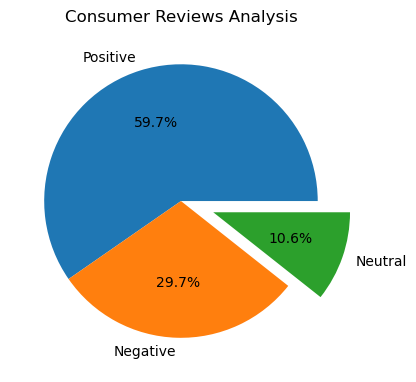

In [38]:
#Plotting the negative, positive, and neutral reviews.
plt.figure(figsize=(15,7))
plt.subplot(1,3,2)
plt.title("Consumer Reviews Analysis")
plt.pie(reviews_counts.values, labels = reviews_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

<h2> Consumer Opinions Analysis

In [39]:
# Consumer analaysis of their opinions about British Airways.

nlp = en_core_web_sm.load()
print('Cosnumers Opinions About British Airways:\n')
for i in range(0, 7):
    text = ' '.join(map(str,engreviews.tolist()[i * 500:(i + 1) * 500]))
    doc = nlp(text)
    statements_1 = textacy.extract.semistructured_statements(doc, entity=re.compile('british airways', re.IGNORECASE), cue=('be'))
    statements_2 = textacy.extract.semistructured_statements(doc, entity=re.compile('ba', re.IGNORECASE), cue=('be'))
    for statement in statements_1:
        subject, verb, fact = statement
        print(f' - {" ".join(map(str,fact))}')
    for statement in statements_2:
        subject, verb, fact = statement
        print(f' - {" ".join(map(str,fact))}')

Cosnumers Opinions About British Airways:

 - the worst air company I have ever flown with
 - their partner airline
 - the most terrible airline I ’ve ever dealt with
 - a great airline
 - a glorified budget airline
 - one of the few commercial carriers in the world that charges an exorbitant amount in fees when booking travel
 - the main operator at Heathrow T5
 - the best operator from Ulster to England
 - a game of two halves
 - the bottom of the pile and reluctantly the last one I would use
 - the worst and
 - a waste of my money
 - the airline they once were
 - my last choice of an airline
 - my first priority
 - my favorite airline
 - a rip off
 - a disgrace of an airline
 - a premium carrier
 - the return leg from Madrid to London Heathrow
 - the only one flying 747s to Europe from Seattle )
 - a low cost airline
 - how much behind the play
 - AA partner
 - a disgrace for a once proud airline ,
 - a disgrace
 - the lowest cost option on this route
 - a good choice
 - a warranty


<h2> Topic Modeling

In [40]:
# Constructing a function to remove stopwords, punctuations, tokenization, lemmatization.

lemmatizer = WordNetLemmatizer()

def clean_text(data):
    cleaned_text = []
    stopword = stopwords.words('english')

    for text in data:
        text = str(text).lower()
        text = re.sub(r'[^\w ]+', '', text)
        text = ' '.join([lemmatizer.lemmatize(word,pos='v') for word in word_tokenize(text) if not word in set(stopword) and len(word)>3])
        cleaned_text.append(text)        
    return cleaned_text

cleaned_reviews_list = clean_text(engreviews.tolist())

In [41]:
# Defining a function to show the most occurring words.

def words_frequency(text, top_n = 20):
    words = ' '.join([sent for sent in text])
    words = words.split()
    freq_dist = FreqDist(words)
    words_df = pd.DataFrame({'word':list(freq_dist.keys()), 'count':list(freq_dist.values())})
  
    
    c = words_df.nlargest(columns='count', n=top_n) 
    plt.figure(figsize=(15,8))
    ax = sns.barplot(data=c, x='word', y='count')
    ax.set(ylabel='Count')
    plt.title('Twenty Frequent Popular Words')
    plt.show();

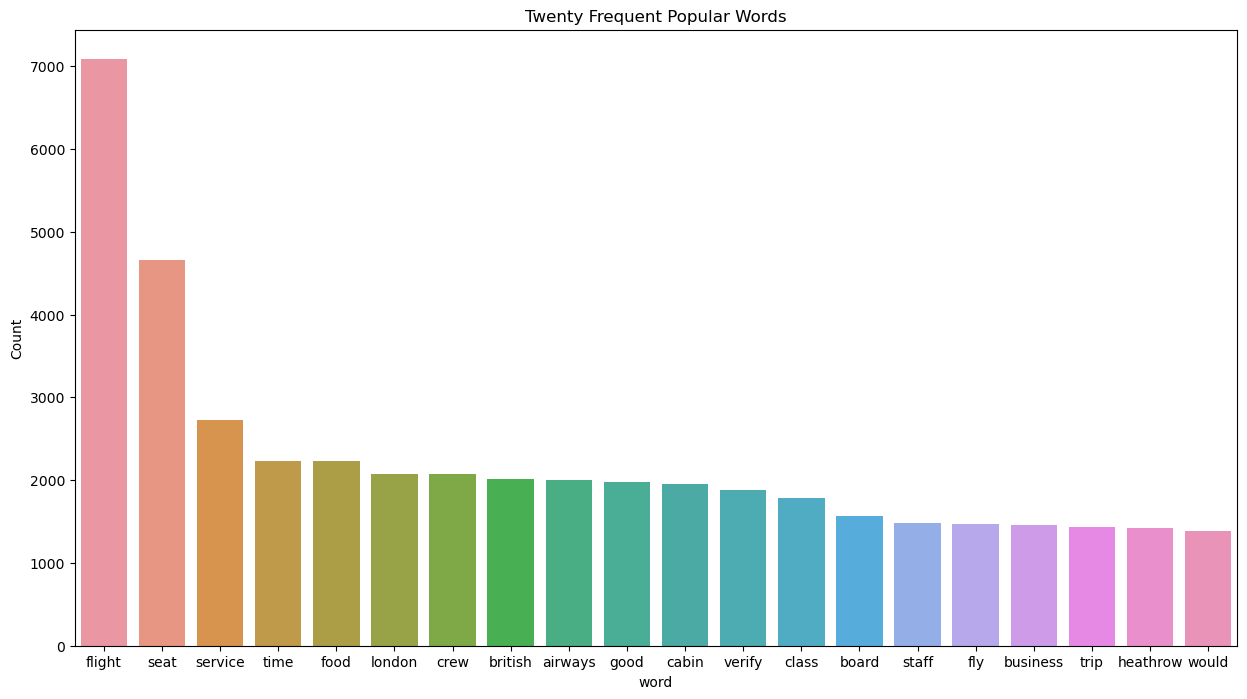

In [42]:
words_frequency(cleaned_reviews_list)

In [43]:
# Performing functions for data preprocessing.

stemmer = SnowballStemmer("english")
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

In [44]:
#Defining a fuction for tokenize and lemmatize.

def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            #Apply lemmatize_stemming on the token, then add to the results list
            result.append(lemmatize_stemming(token))
    return result

In [45]:
#Calling the preprocess function.
processed_docs = BritAir['reviews'].map(preprocess)
processed_docs[:10]

0    [verifi, worst, experi, outbound, flight, canc...
1    [trip, verifi, check, shambl, counter, open, f...
2    [trip, verifi, disgust, fact, baggag, deliv, w...
3    [trip, verifi, juli, submit, complaint, form, ...
4    [trip, verifi, book, flight, cancel, flight, l...
5    [trip, verifi, london, gibraltar, octob, book,...
6    [verifi, general, loyal, gold, status, flyer, ...
7    [trip, verifi, great, flight, suit, aircraft, ...
8    [trip, verifi, happi, flight, good, second, ra...
9    [trip, verifi, year, fli, enjoy, time, chang, ...
Name: reviews, dtype: object

In [46]:
#Constructing a dictionary.
dictionary = gensim.corpora.Dictionary(processed_docs)

In [47]:
#Consstructing a bag--of-words model for every document.
document_num = 4310
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [48]:
bow_corpus[0]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 2),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 2),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 1),
 (20, 1)]

In [49]:
#Creating a 1
lda_model = gensim.models.LdaMulticore(bow_corpus[:-1], 
                                       num_topics=7, 
                                       id2word = dictionary, 
                                       passes = 2, 
                                       workers=2)

In [50]:
#Printing the airline topics.
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

Topic: 0 
Words: 0.036*"flight" + 0.017*"seat" + 0.011*"hour" + 0.010*"verifi" + 0.010*"check" + 0.010*"crew" + 0.010*"servic" + 0.009*"time" + 0.008*"london" + 0.008*"food"


Topic: 1 
Words: 0.023*"flight" + 0.012*"verifi" + 0.012*"servic" + 0.011*"hour" + 0.011*"london" + 0.010*"trip" + 0.010*"seat" + 0.009*"serv" + 0.009*"crew" + 0.009*"british"


Topic: 2 
Words: 0.020*"flight" + 0.013*"london" + 0.012*"seat" + 0.010*"time" + 0.008*"arriv" + 0.008*"british" + 0.008*"servic" + 0.008*"tell" + 0.007*"verifi" + 0.007*"airway"


Topic: 3 
Words: 0.031*"seat" + 0.028*"flight" + 0.014*"food" + 0.012*"class" + 0.011*"servic" + 0.010*"busi" + 0.010*"cabin" + 0.008*"crew" + 0.008*"verifi" + 0.008*"staff"


Topic: 4 
Words: 0.029*"flight" + 0.021*"seat" + 0.015*"servic" + 0.015*"good" + 0.013*"time" + 0.011*"crew" + 0.011*"cabin" + 0.010*"london" + 0.009*"economi" + 0.009*"drink"


Topic: 5 
Words: 0.027*"flight" + 0.016*"servic" + 0.010*"british" + 0.010*"custom" + 0.009*"airway" + 0.009*"s